In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import array
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import distance
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import math
import pickle, os
%matplotlib inline 

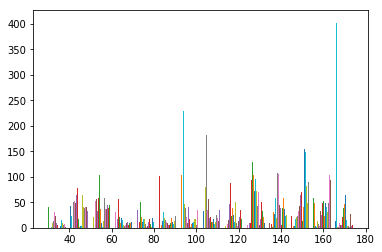

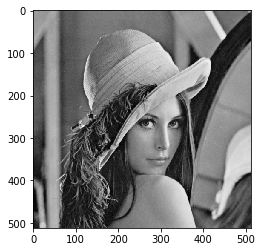

In [2]:
# Loading grayscale lena image and plotting its histogram
def load_lena():
    fname = 'lena.dat'
    f = open(fname,'rb')
    lena = array(pickle.load(f))
    f.close()
    return lena

lena_img = load_lena()
plt.gray()
plt.hist(lena_img, bins = 'auto')
plt.show()
plt.imshow(lena_img)
plt.show()


In [3]:
# Mahalanobis distance 
V1 =[28, 31, 130.0, 68.12]
V2 = [24, 28, 143.0, 127.89]
V3 = [28, 20, 136.0, 89.03]
V4 = [32, 34, 130.5, 78.28]
V5 = [22, 15, 125.0, 134.08]
V6 = [26, 37, 147.5, 135.31]
V7 = [24, 19, 135.0, 130.48]
V8 =  [28, 22, 125.0, 86.48]
V9 =  [24, 26, 127.0, 129.47]
V10 = [30, 21, 139.0, 82.43]
V11 = [22, 20, 121.5, 127.41]
V12 = [30, 38, 150.5, 71.21]
V13 = [24, 17, 120.0, 132.06]
V14 = [26, 20, 125.0, 90.85]
X = [V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14]
mean_X = np.mean(X, axis = 0)
print (" Mean of the dataset = ", mean_X)
Cov_X  = np.cov(X, rowvar=False) 
print (" Covariance = \n", Cov_X)
X1=[30, 20, 133, 189.6]
X2=[22, 30, 100.06, 126.0075]
X3=[28.47, 20.11, 133.06, 188.90]
print (" Inverse of Covariance = \n", np.linalg.inv(Cov_X))
D1 = distance.mahalanobis(X1, mean_X, np.linalg.inv(Cov_X))
D2 = distance.mahalanobis(X2, mean_X, np.linalg.inv(Cov_X))
D3 = distance.mahalanobis(X3, mean_X, np.linalg.inv(Cov_X))
print ("D1 = ",D1)
print ("D2 = ",D2)
print ("D3 = ",D3)
print ("DMIN = ", min(D1, D2, D3))

 Mean of the dataset =  [ 26.28571429  24.85714286 132.5        105.93571429]
 Covariance = 
 [[  9.75824176  12.81318681  12.07692308 -72.15406593]
 [ 12.81318681  56.9010989   49.11538462 -70.62065934]
 [ 12.07692308  49.11538462  92.80769231 -46.06961538]
 [-72.15406593 -70.62065934 -46.06961538 714.00118022]]
 Inverse of Covariance = 
 [[ 0.58465881 -0.04194565 -0.02749362  0.0531605 ]
 [-0.04194565  0.03896147 -0.01585996 -0.00140858]
 [-0.02749362 -0.01585996  0.02126939 -0.00297471]
 [ 0.0531605  -0.00140858 -0.00297471  0.00644149]]
D1 =  9.46059352152669
D2 =  5.5389941702554735
D3 =  8.30654313092512
DMIN =  5.5389941702554735


Euclidean distacne =  [92.33092656309694, 39.71145930332956, 18.027756377319946, 28.337254630609507, 60.207972893961475]
Minimum distance =  18.027756377319946
Blue is point X, Green is the closest point to X


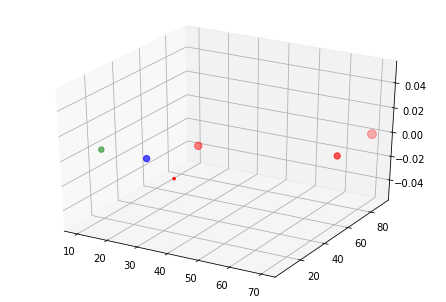

In [4]:
# Euclidean distance
P= array([70,90,80])
Q= array([40,6,6])
R= array([10,20,30])
S= array([32,43,55])
T= array([70,60,40])

X= array([25,20,40])
dist_P = np.linalg.norm(P-X)
dist_Q = np.linalg.norm(Q-X)
dist_R = np.linalg.norm(R-X)
dist_S = np.linalg.norm(S-X)
dist_T = np.linalg.norm(T-X)
dist = [dist_P, dist_Q, dist_R, dist_S, dist_T]
print ("Euclidean distacne = ", dist)
dist_min = min(dist)
print ("Minimum distance = ", dist_min)
V = np.array([P, Q, R, S, T, X])
fig = plt.figure()
ax = Axes3D(fig)
print ("Blue is point X, Green is the closest point to X")
plt.scatter(V.T[0], V.T[1], V.T[2], color=['red','red','green', 'red','red','blue'])
plt.show()

In [5]:
# Cosine Distance
doc1 = open("doc1.txt","r")
doc2 = open("doc2.txt","r")
s1 = doc1.read();
s2 = doc2.read();

documents  = (s1,s2);

count_vectorizer = CountVectorizer()
count_matrix = count_vectorizer.fit_transform(documents)

arr = cosine_similarity(count_matrix[0:1], count_matrix[1:2])
cosineDistance = 1 - arr[0][0]
print ("Cosine Distance = ",cosineDistance)
angle_in_radians = math.acos(cosineDistance)

Cosine Distance =  0.7369616203114283
